### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [41]:
import spacy
import glob 

In [62]:
files = glob.glob('./HW1_/*.txt')

In [63]:
for name in files : 
    file = open(name,'r')
    data=file.read()
    print(name, " ",len(data))

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [64]:
temp_list=[]
for name in files : 
    file = open(name,'r')
    data=file.read()
    str_len = len(data)
    temp_list.append((file, str_len))

In [65]:
# save the top 15 string length values
temp_list.sort(reverse=True)
temp_list=temp_list[0:15]

In [66]:
dict={}
for name in files : 
    file = open(name,'r')
    data=file.read()
    if len(data) in temp_list:
        index=temp_list.index(len(data))+1
        dict[index]=name

In [68]:
for i in range(0,15):
    print(str(int(i+1))+".",temp_list[i],dict[i+1])

IndexError: list index out of range

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [58]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [59]:
batches=[]
for name in files:
    file= open(name,'r')
    data= file.read()
    batch=split_into_batches(data,10000)
    batches=batches+batch
print('Total number of batches:',len(batches))

Total number of batches: 0


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

In [18]:

import re
histogram = {}
for batch in batches: 
    parsed_text=nlp(batch)
    for token in parsed_text:
        token_lemma = token.lemma_ 
        if not (token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
            if re.match('[a-zA-Z]+$',token_lemma):
                if token_lemma not in histogram:  # if the token text is not already a key in the dictionary, create it and set its value to 1
                    histogram[token_lemma] = 1
                else:  # the token text is already a key in the dictionary so increase its value by 1
                    histogram[token_lemma] += 1

In [19]:
from operator import itemgetter
sorted_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

word_fre_rank=[]
i=1
for tuple in sorted_token_count_pairs:
    lis=list(tuple)
    lis.append(i)
    i=i+1
    if i <=51:
        word_fre_rank.append(lis)

In [20]:
import pandas as pd
df = pd.DataFrame(word_fre_rank)
df.columns = ['Word', 'Frequency','Rank']
df[:50]

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

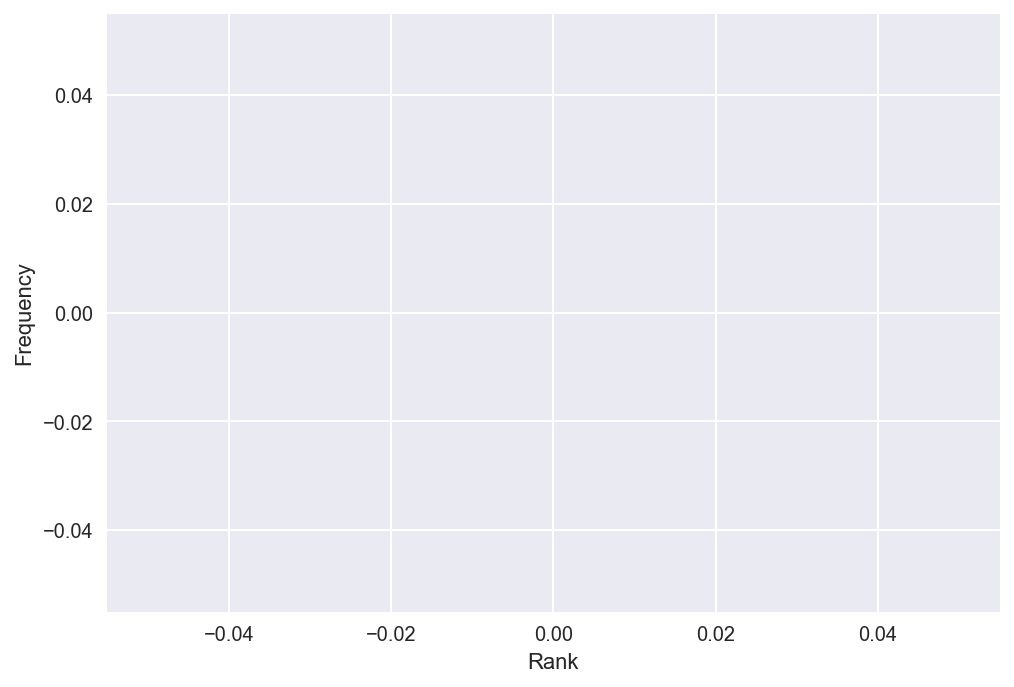

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

num_top_lemmas_to_plot = len(sorted_token_count_pairs)
top_counts = [count for lemma, count in sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.scatter(range(num_top_lemmas_to_plot),top_counts)
plt.xlabel('Rank')
plt.ylabel('Frequency');


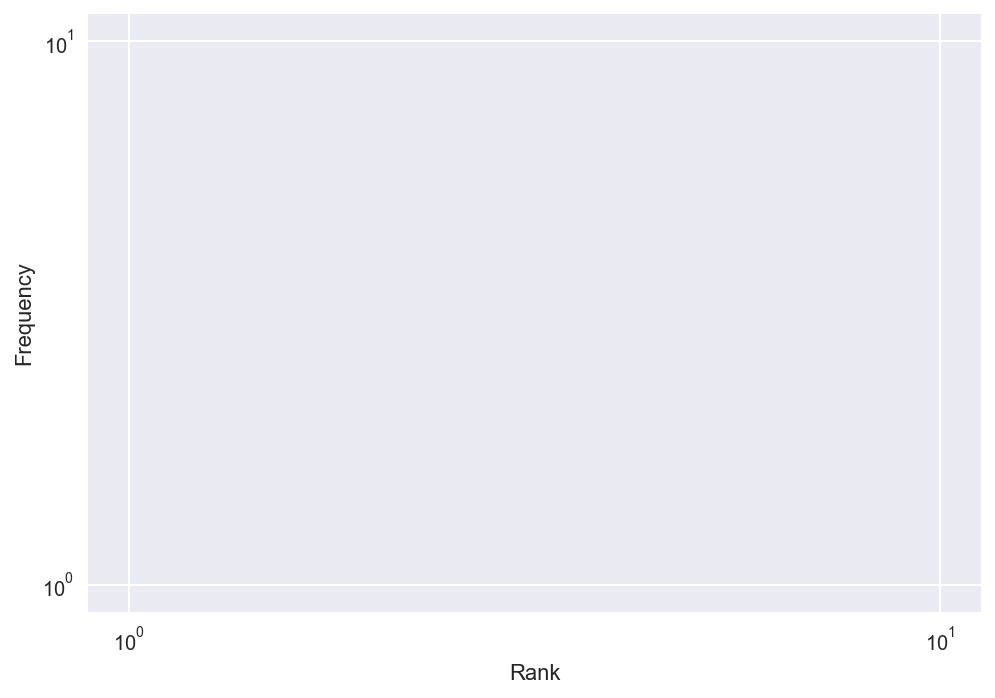

In [22]:
import numpy as np
num_top_lemmas_to_plot = len(sorted_token_count_pairs)
x_input = np.linspace(1, len(sorted_token_count_pairs), num=len(sorted_token_count_pairs))
y_input = [count for lemma, count in sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.loglog(x_input, y_input)
plt.xlabel('Rank')
plt.ylabel('Frequency');

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [3 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** It is observed that the frequency of any word is inversely proportional to its rank, the slope is close to -1 if drawing a straight line alone with the original line. It does consist of the power law  ***

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [23]:
all_sum=0
for tup in sorted_token_count_pairs:
    num=tup[1]
    all_sum=all_sum+num
    
four_fre_sum=0
for tup in sorted_token_count_pairs[0:4]:
    num=tup[1]
    four_fre_sum=four_fre_sum+num
prob_4=four_fre_sum/all_sum

fifty_fre_sum=0
for tup in sorted_token_count_pairs[0:50]:
    num=tup[1]
    fifty_fre_sum=fifty_fre_sum+num
prob_50=fifty_fre_sum/all_sum


print('Probability of drawing one of the 4 most frequent alphabetic lemmas:',prob_4)
print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ',prob_50)

ZeroDivisionError: division by zero

**Subpart iii [3 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [24]:
once_sum=0
for tup in sorted_token_count_pairs:
    if tup[1]==1:
        once_sum=once_sum+1
prob_once= once_sum/len(sorted_token_count_pairs) 

fewer_10_sum=0
for tup in sorted_token_count_pairs:
    if tup[1]<10:
        fewer_10_sum=fewer_10_sum+1
prob_fewer_10= fewer_10_sum/len(sorted_token_count_pairs)


print("Occur only once: ",prob_once)
print("Occur fewer than 10 times: ",prob_fewer_10)

ZeroDivisionError: division by zero

### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [55 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [ ]:
import spacy
import nltk
nltk.download('reuters')
nlp = spacy.load('en_core_web_sm', disable=['parser'])

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]

In [ ]:
label_counter = Counter()
for paragraph in reuters_nlp:
    for entity in paragraph.ents:
        label_counter[entity.label_] += 1  
sorted_ent_label_count_pairs = label_counter.most_common()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina' 

entity = [entity for entity, count in sorted_ent_label_count_pairs]
counts = [count for entity, count in sorted_ent_label_count_pairs]
plt.bar(range(len(sorted_ent_label_count_pairs)),counts)
plt.xticks(range(len(sorted_ent_label_count_pairs)),entity, rotation=90)
plt.xlabel('Entity Label')
plt.ylabel('Raw count');

#### sorted_ent_label_count_pairs[0:5]

**(b) [20 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [ ]:
lowercase_GPE_entity_counter=Counter()
for paragraph in reuters_nlp:
    temp_list=[]
    check_existence={}
    for ent in paragraph.ents:
        temp_list.append(ent.orth_.lower())
    for entity in paragraph.ents:
            if entity.label_ == 'GPE':
                if entity.orth_.lower() in temp_list:
                    check_existence[entity.orth_.lower()]=True
    for str_lower_ent in check_existence:
        if check_existence.get(str_lower_ent)==True:
            lowercase_GPE_entity_counter[str_lower_ent]+=1

In [ ]:
sorted_lowercase_GPE_entity_counter=lowercase_GPE_entity_counter.most_common()
print('Top 10 most frequently occurring GPE entities :')
sorted_lowercase_GPE_entity_counter[0:10]

In [ ]:
lowercase_ORG_entity_counter=Counter()
for paragraph in reuters_nlp:
    temp_list=[]
    check_existence={}
    for ent in paragraph.ents:
        temp_list.append(ent.orth_.lower())
    for entity in paragraph.ents:
            if entity.label_ == 'ORG':
                if entity.orth_.lower() in temp_list:
                    check_existence[entity.orth_.lower()]=True
    for str_lower_ent in check_existence:
        if check_existence.get(str_lower_ent)==True:
            lowercase_ORG_entity_counter[str_lower_ent]+=1

In [ ]:
sorted_lowercase_ORG_entity_counter=lowercase_ORG_entity_counter.most_common()
print('Top 10 most frequently occurring ORG entities :')
sorted_lowercase_ORG_entity_counter[0:10]

**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [ ]:
# calculate the prob of opec
num_doc_opec=0
for paragraph in reuters_nlp:
    for entity in paragraph.ents:
        if entity.label_ == 'ORG':
            if entity.orth_.lower()=='opec':
                num_doc_opec=num_doc_opec+1
                break 
prob_opec= num_doc_opec/ len(reuters_nlp)
prob_opec

In [ ]:
# calculate the prob of each GPE 
prob_GPE={}
for tuple in sorted_lowercase_GPE_entity_counter:
    prob_GPE[tuple[0]] = tuple[1]/ len(reuters_nlp)

In [ ]:
# calculate the prob (GPE entity, opec)
count=0
GPE_pair_with_opec_counter=Counter()
for paragraph in reuters_nlp:
    temp_list_opec=[]
    temp_list_GPE=[]
    combine_list=[]
    for ent in paragraph.ents:
        if ent.label_ == 'ORG' and ent.orth_.lower()== 'opec':
            if 'opec' not in temp_list_opec:
                temp_list_opec.append(ent.orth_.lower())
    for ent in paragraph.ents:
        if ent.label_ == 'GPE':
            if ent.orth_.lower() not in temp_list_GPE:
                temp_list_GPE.append(ent.orth_.lower())    
    if 'opec' in temp_list_opec:
        for entity in temp_list_GPE:
            GPE_pair_with_opec_counter[entity]+=1    

sorted_GPE_pair_with_opec_counter= GPE_pair_with_opec_counter.most_common()
prob_GPE_pair_with_opec={}
for tuple in sorted_GPE_pair_with_opec_counter:
    prob_GPE_pair_with_opec[tuple[0]] = tuple[1]/len(reuters_nlp)

In [ ]:
#calculate the PMI 
import numpy as np 
denominator={}
PMI_pair_opec={}
for lowercase_entity in prob_GPE:
    denominator[lowercase_entity]= prob_GPE.get(lowercase_entity)*prob_opec
for lowercase_entity in prob_GPE_pair_with_opec:
    PMI_pair_opec[lowercase_entity] = np.log(prob_GPE_pair_with_opec[lowercase_entity]/denominator[lowercase_entity])

sorted_PMI_pair_opec = sorted(PMI_pair_opec.items(), key=lambda x:x[1], reverse=True)
sorted_PMI_pair_opec[0:50]

Your text answer (for this question, your answer is *not* code): ***The most frequent entities across the document do not show a high PMI score with the word "OPEC," such as "u.s." and "japan." This is because, even though these entities appear frequently, they tend to be independent of OPEC.The entities that have a high PMI score with OPEC are not necessarily the ones that appear frequently in the document, but rather, they show a strong dependence on OPEC when they appear.***